<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 3

### Regression and Classification with the Ames Housing Data

---

You have just joined a new "full stack" real estate company in Ames, Iowa. The strategy of the firm is two-fold:
- Own the entire process from the purchase of the land all the way to sale of the house, and anything in between.
- Use statistical analysis to optimize investment and maximize return.

The company is still small, and though investment is substantial the short-term goals of the company are more oriented towards purchasing existing houses and flipping them as opposed to constructing entirely new houses. That being said, the company has access to a large construction workforce operating at rock-bottom prices.

This project uses the [Ames housing data recently made available on kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques).

In [369]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline
#!pip install missingno

import warnings
warnings.filterwarnings("ignore")


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Estimating the value of homes from fixed characteristics.

---

Your superiors have outlined this year's strategy for the company:
1. Develop an algorithm to reliably estimate the value of residential houses based on *fixed* characteristics.
2. Identify characteristics of houses that the company can cost-effectively change/renovate with their construction team.
3. Evaluate the mean dollar value of different renovations.

Then we can use that to buy houses that are likely to sell for more than the cost of the purchase plus renovations.

Your first job is to tackle #1. You have a dataset of housing sale data with a huge amount of features identifying different aspects of the house. The full description of the data features can be found in a separate file:

    housing.csv
    data_description.txt
    
You need to build a reliable estimator for the price of the house given characteristics of the house that cannot be renovated. Some examples include:
- The neighborhood
- Square feet
- Bedrooms, bathrooms
- Basement and garage space

and many more. 

Some examples of things that **ARE renovate-able:**
- Roof and exterior features
- "Quality" metrics, such as kitchen quality
- "Condition" metrics, such as condition of garage
- Heating and electrical components

and generally anything you deem can be modified without having to undergo major construction on the house.

---

**Your goals:**
1. Perform any cleaning, feature engineering, and EDA you deem necessary.
- Be sure to remove any houses that are not residential from the dataset.
- Identify **fixed** features that can predict price.
- Train a model on pre-2010 data and evaluate its performance on the 2010 houses.
- Characterize your model. How well does it perform? What are the best estimates of price?

> **Note:** The EDA and feature engineering component to this project is not trivial! Be sure to always think critically and creatively. Justify your actions! Use the data description file!

In [370]:
# Load the data
missing_values=["n/a","na",'nan',' nan',"-",","," "]
house = pd.read_csv('./housing.csv',na_values=missing_values)
                    

In [371]:
# A:
house.head()
house.shape

(1460, 81)

In [372]:
house.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [373]:
house.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

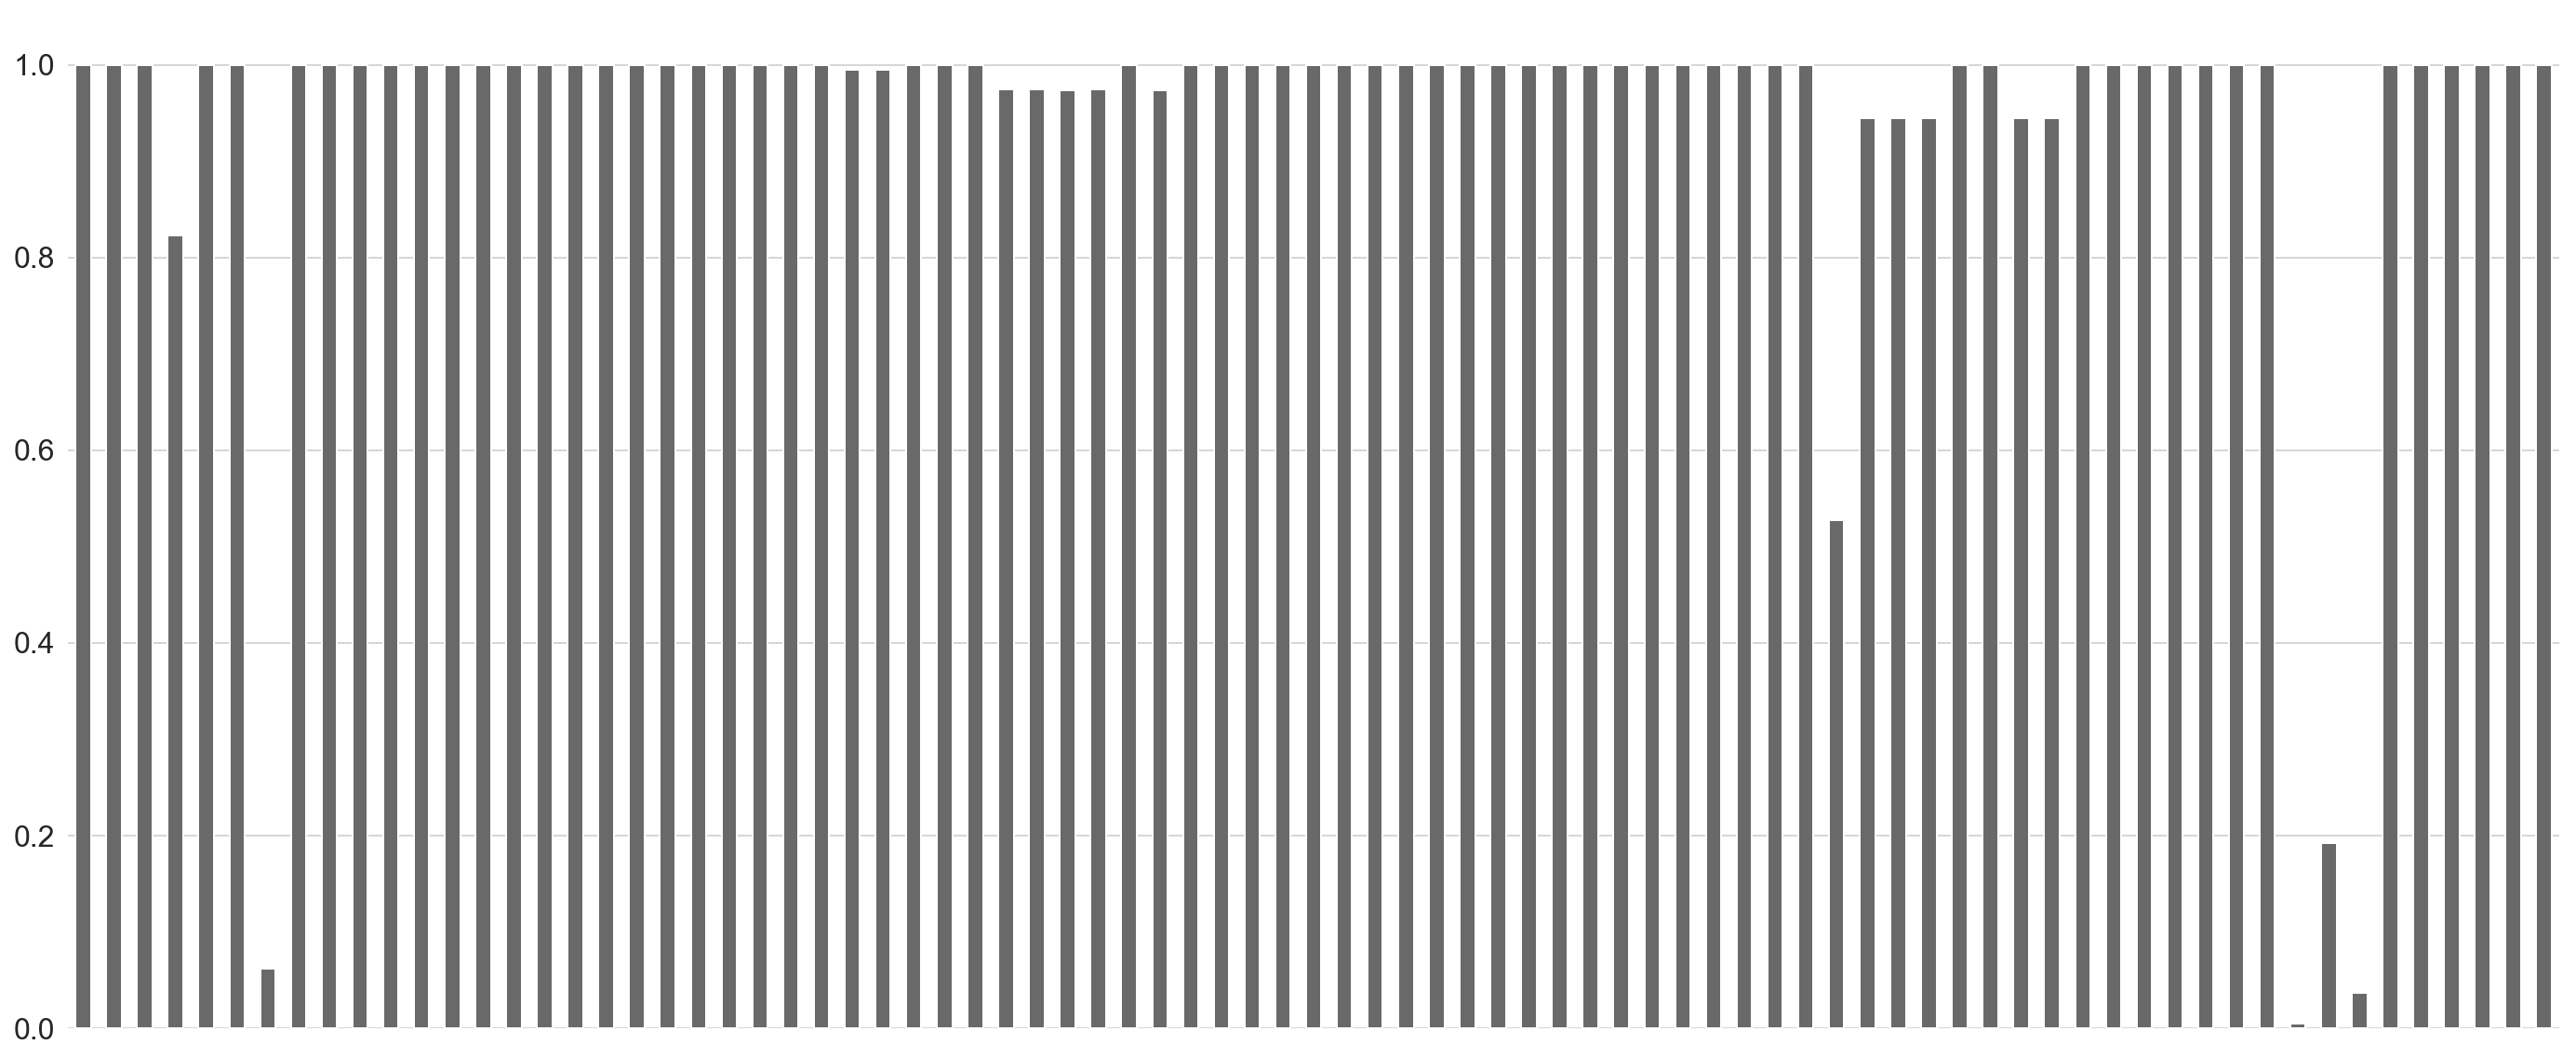

In [374]:
import missingno as msno
msno.bar(house)

In [375]:
house.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [376]:
#defining a function to group the categorical variable by saleprice.This helps to impute values (most occuring or median value)
def mean_prices_categorical(df):
    for i in df:
        if df[i].dtype == 'O':
            print(house.groupby(i)['SalePrice'].mean() )
        
            print("\n")
print(mean_prices_categorical(house))


MSZoning
C (all)     74528.000000
FV         214014.061538
RH         131558.375000
RL         191004.994787
RM         126316.830275
Name: SalePrice, dtype: float64


Street
Grvl    130190.500000
Pave    181130.538514
Name: SalePrice, dtype: float64


Alley
Grvl    122219.080000
Pave    168000.585366
Name: SalePrice, dtype: float64


LotShape
IR1    206101.665289
IR2    239833.365854
IR3    216036.500000
Reg    164754.818378
Name: SalePrice, dtype: float64


LandContour
Bnk    143104.079365
HLS    231533.940000
Low    203661.111111
Lvl    180183.746758
Name: SalePrice, dtype: float64


Utilities
AllPub    180950.95682
NoSeWa    137500.00000
Name: SalePrice, dtype: float64


LotConfig
Corner     181623.425856
CulDSac    223854.617021
FR2        177934.574468
FR3        208475.000000
Inside     176938.047529
Name: SalePrice, dtype: float64


LandSlope
Gtl    179956.799566
Mod    196734.138462
Sev    204379.230769
Name: SalePrice, dtype: float64


Neighborhood
Blmngtn    194870.882353
Bl

In [377]:
miss_col=['BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath']

In [378]:
#Imputing values

miss_col1=['BsmtQual', 'BsmtCond','BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2']
for col in miss_col1:
    house.loc[house[col].isnull(), col] = 'NA'

In [379]:
#dropping non residential property
house= house[house.MSZoning.isin(['RL','RP' 'RM','RH'])].reset_index(drop=True)
house.shape

(1167, 81)

In [380]:
#dropping columns with more missing values and dropping id column
house= house.drop(['Alley','Fence','Id'],axis=1)

In [381]:

house['LotFrontage'].median()

72.0

In [382]:
#imputing value for LotFrontage with the median value
house['LotFrontage'] = house['LotFrontage'].fillna((house['LotFrontage'].median()))

In [383]:
miss_col2=['GarageType','GarageFinish','GarageQual','GarageCond']

for col in miss_col2:
    house.loc[house[col].isnull(), col] = 'NA'


In [384]:
house['GarageType'].unique()

array(['Attchd', 'Detchd', 'BuiltIn', 'CarPort', 'NA', 'Basment',
       '2Types'], dtype=object)

In [385]:
#Assuming values missing as it is not available.
house.loc[house['PoolQC'].isnull(),'PoolQC'] = 'NA'
house.loc[house['MiscFeature'].isnull(),'MiscFeature'] = 'NA'
house.loc[house['FireplaceQu'].isnull(), 'FireplaceQu'] = 'NA'

In [386]:
# replacing null values in MasVnrType with none and MasVnrArea as zero
house.loc[house['MasVnrType'].isnull(), 'MasVnrType'] = 'None'
house.loc[house['MasVnrArea'].isnull(),'MasVnrArea'] = 0

In [387]:
#replacing null value in GarageYrBlt with same values as YearBuilt since it is same in normal case.

house.loc[house['GarageYrBlt'].isnull(), 'GarageYrBlt'] = house.loc[house['GarageYrBlt'].isnull(), 'YearBuilt']

In [388]:
#Assigning largest occuring valaue
house.loc[house['Electrical'].isnull(), 'Electrical'] = 'SBrkr'

In [389]:


house.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
                ..
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
FireplaceQu      0
GarageType       0
GarageYrBlt      0
GarageFinish     0
GarageCars       0
GarageArea       0
GarageQual       0
GarageCond       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea    

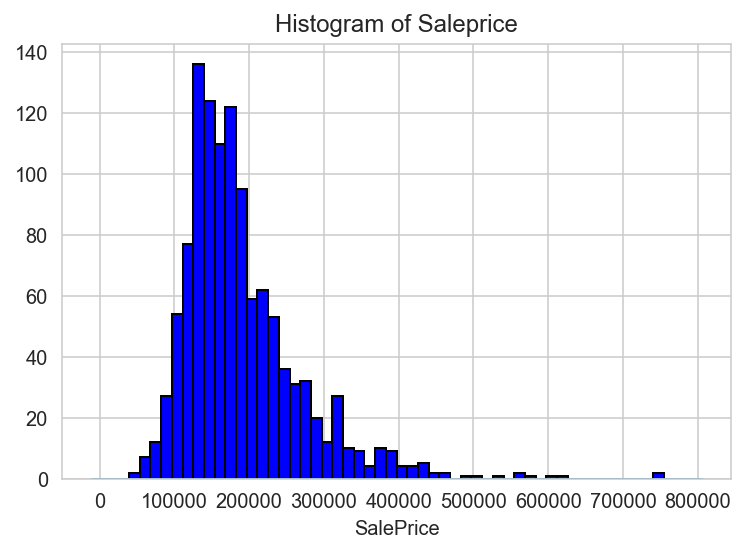

In [390]:
plt.hist(house.SalePrice, color = 'blue', edgecolor = 'black',
         bins = 50)
plt.title('Histogram of Saleprice')

plt.xlabel('Sale Price')

sns.distplot(house.SalePrice,bins=50)

In [391]:
#outliers excluded- there are 2 houses with saleprice above 700000.
house.drop(house.index[house['SalePrice']>=700000], inplace = True)
house.shape

(1165, 78)

In [392]:
#saving the cleaned dataframe 

house_new=house.copy()


In [393]:
house_new.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF'

In [394]:
#fixed variables 

fixed_col = ["MSZoning","Street","LandContour" ,"LotConfig", "Neighborhood", "Condition1" ,"Condition2", "BldgType","HouseStyle" ,"RoofStyle", "RoofMatl" ,"Exterior1st" ,"Exterior2nd", "MasVnrType", "Foundation" ,"Heating","CentralAir", "GarageType" ,"MiscFeature" ,"SaleType" ,"SaleCondition"]

In [395]:
#Selecting the fixed numerical features from dataset.
numeric_features = house_new.select_dtypes(include=[np.number])


numeric_features.columns



Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [396]:
numeric_features=numeric_features.drop('OverallQual',axis=1)

In [397]:
corr_list = sorted(house.corr().to_dict()['SalePrice'].items(), key=lambda x: x[1], reverse=True)
corr_list

[('SalePrice', 1.0),
 ('OverallQual', 0.8043924883991361),
 ('GrLivArea', 0.7000866805744118),
 ('GarageCars', 0.6482895610725948),
 ('GarageArea', 0.6281736783651116),
 ('TotalBsmtSF', 0.5841408946278243),
 ('1stFlrSF', 0.5722273724978293),
 ('TotRmsAbvGrd', 0.5561068434332667),
 ('YearBuilt', 0.5460499608918795),
 ('FullBath', 0.5364162629975928),
 ('MasVnrArea', 0.52827074761233),
 ('YearRemodAdd', 0.5274828358473964),
 ('GarageYrBlt', 0.5149282446057507),
 ('Fireplaces', 0.44007355943616727),
 ('BsmtFinSF1', 0.3482314251822396),
 ('OpenPorchSF', 0.3457466744302521),
 ('2ndFlrSF', 0.32945797196348925),
 ('WoodDeckSF', 0.30451469096075306),
 ('HalfBath', 0.2761429380658794),
 ('LotFrontage', 0.25753790665016907),
 ('LotArea', 0.22853557263215202),
 ('BsmtUnfSF', 0.22524006613750922),
 ('BsmtFullBath', 0.21317990115709726),
 ('BedroomAbvGr', 0.11661773787125117),
 ('ScreenPorch', 0.08292279611689037),
 ('MoSold', 0.05494858031249488),
 ('3SsnPorch', 0.027063230970689037),
 ('PoolArea'

In [398]:
# Define function to generate a correlation heatmap, accepting a DF and correlation method as arguments

def correlation_heat_map(df, corr_method):
    '''This function accepts a dataframe and correlation method string (e.g. 'pearson' or 
    'spearman') and displays the correlation heatmap for the numeric data within the dataframe'''
    
    # Define correlation dataframe, using the corr_method argument
    corrs = df.corr(method=corr_method)

    # Set the default matplotlib figure size:
    fig, ax = plt.subplots(figsize=(40,40))
    
    # Generate a mask for the upper triangle
    mask = np.zeros_like(corrs, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Define title string
    title = f'Heatmap of {corr_method} correlation between numeric fixed features and sales price'
    
    # Plot the heatmap with seaborn
    ax = sns.heatmap(corrs, mask=mask, annot=True, fmt='.2f', annot_kws={'size':18},
                     cmap='RdBu_r', center=0, vmin=-1, vmax=1, cbar_kws={'shrink': 0.8})
    ax.set_title(title, fontsize=28)
    
    # Resize the labels.
    ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=20, rotation=60)
    ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=20, rotation=0)
    
    # Change font size of colormap
    cax = plt.gcf().axes[-1]
    cax.tick_params(labelsize=20) 
    plt.show()

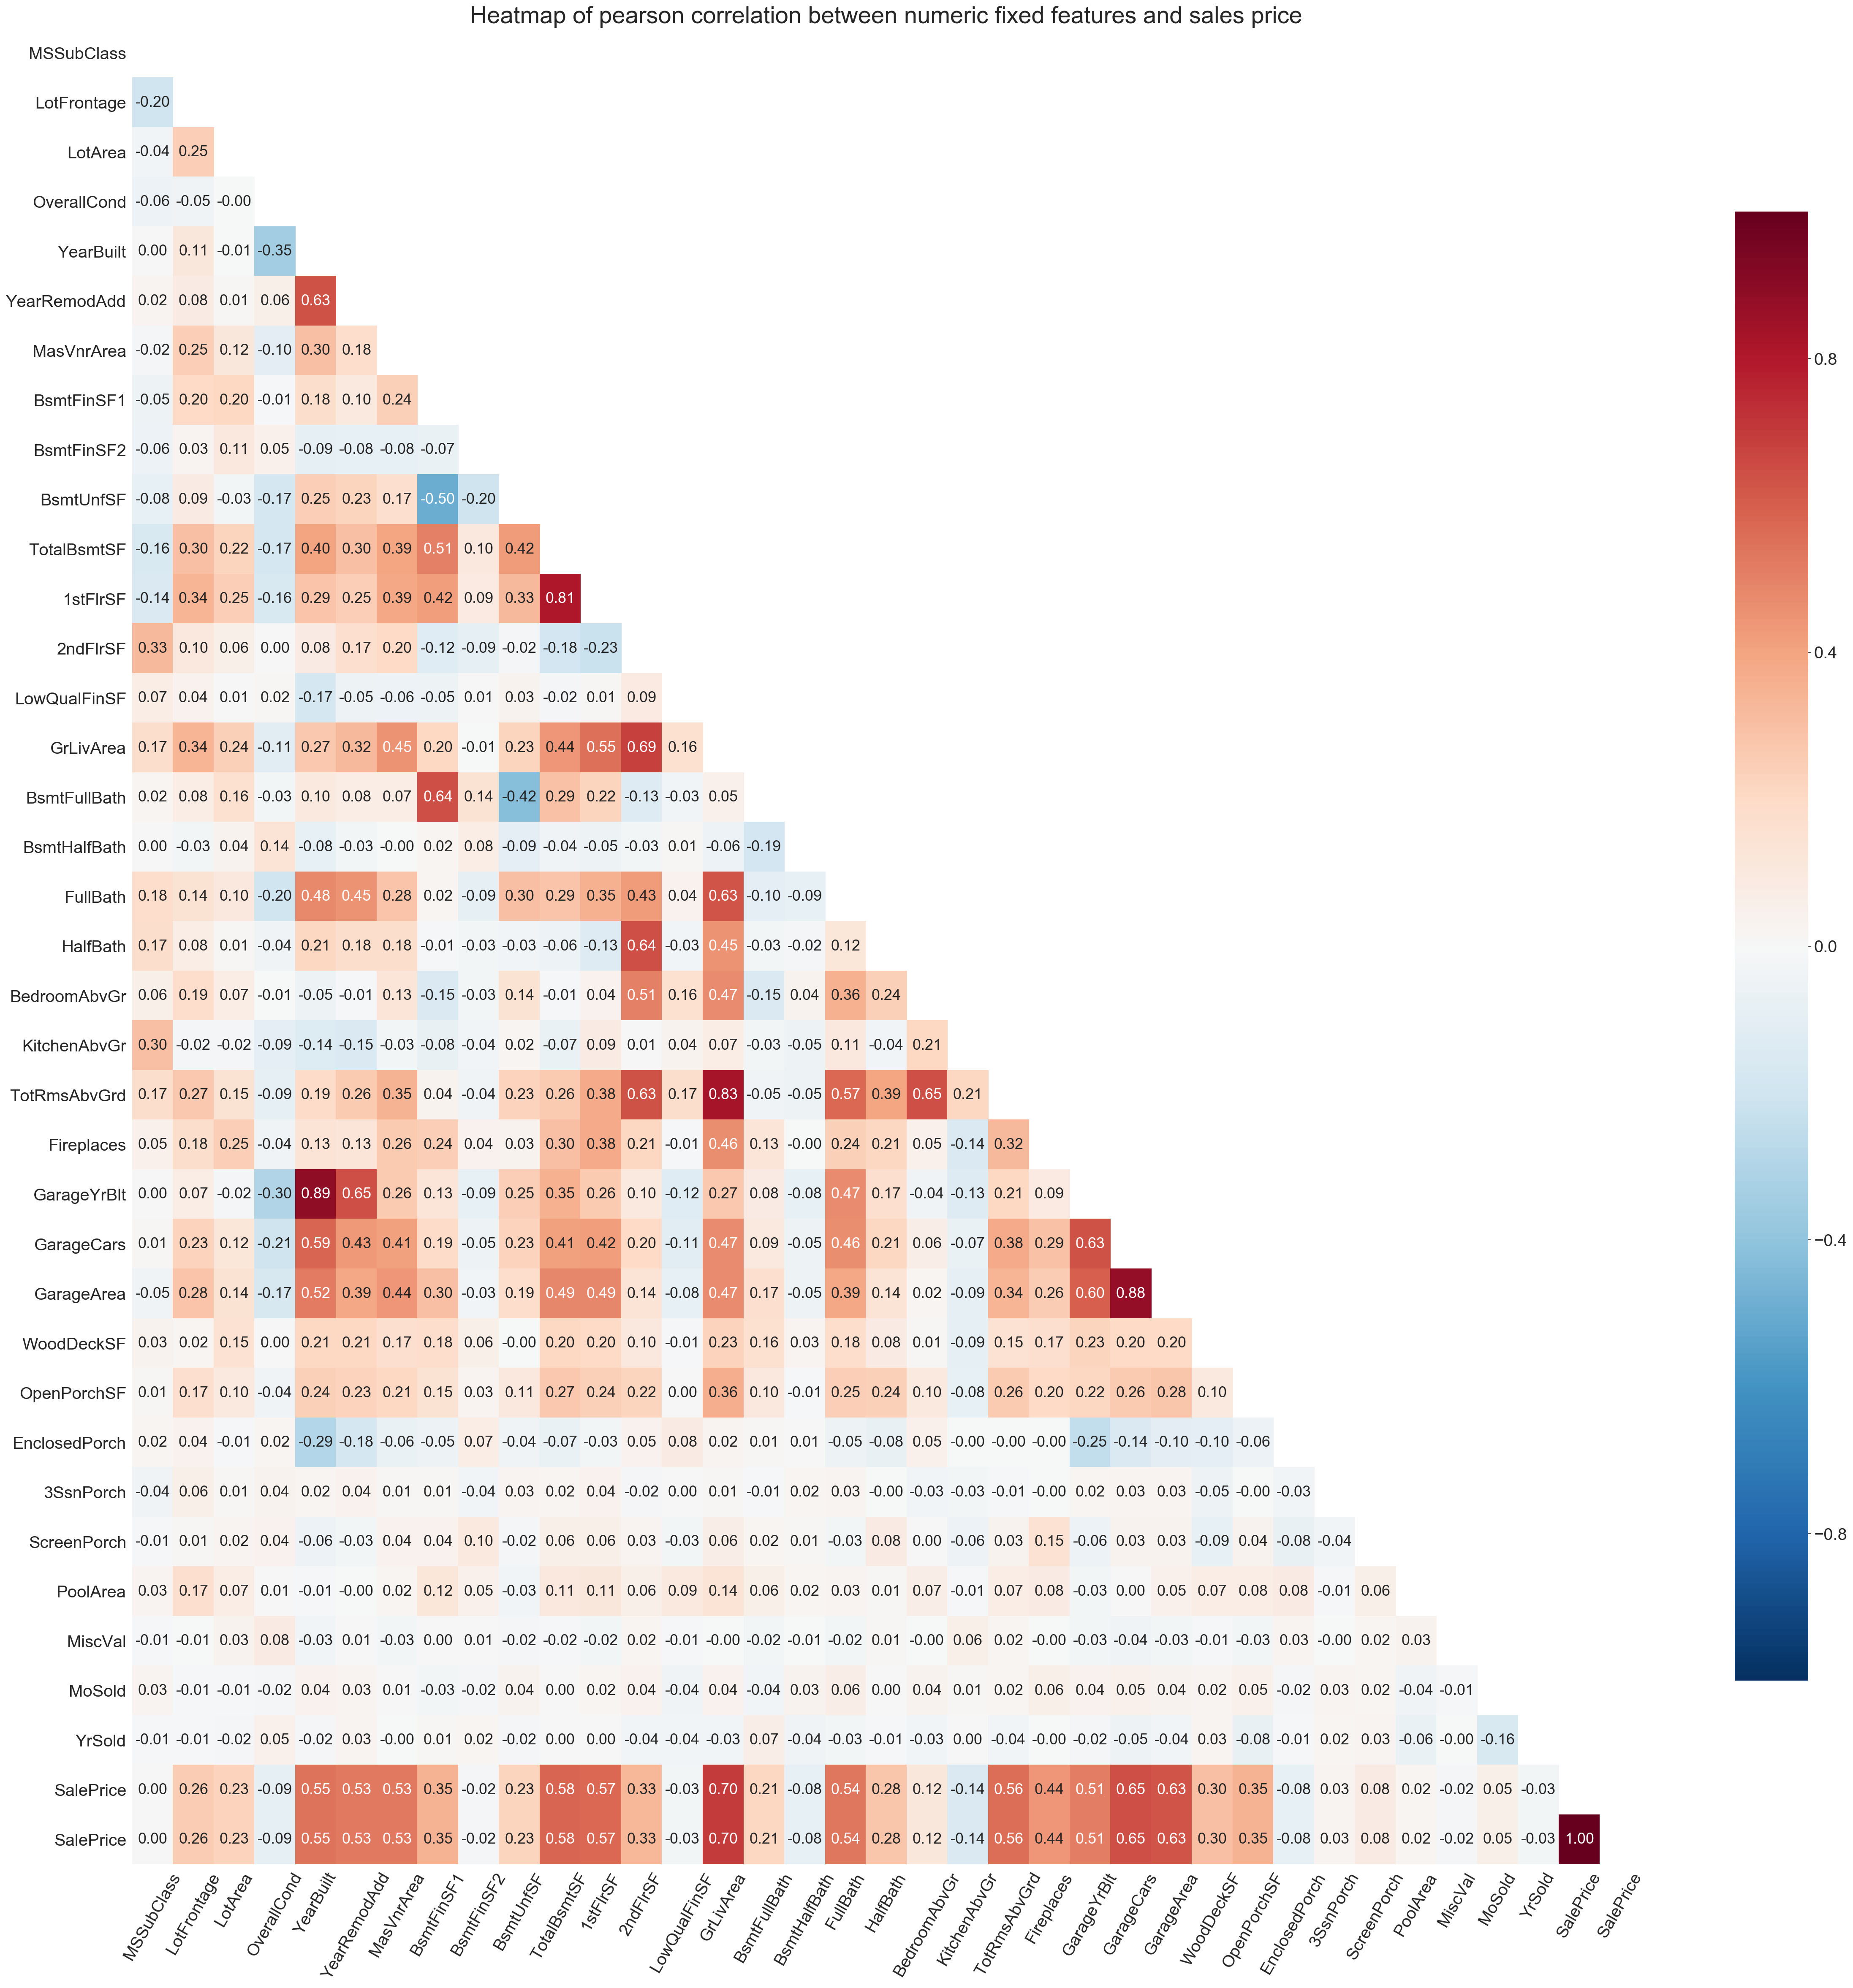

In [399]:
#Call function to generate pearson correlation heatmap for numeric, fixed feature data
# concatenated with SalePrice
correlation_heat_map(pd.concat([numeric_features, house_new.SalePrice], axis=1), 'pearson')


In [400]:
#Assigning the target variable as SalePrice
y=numeric_features['SalePrice']


In [401]:
#dropping high correlated variables
#'GarageCars','GarageYrBelt'

In [402]:
#fixed numerical variables  

numeric_features_fixed= numeric_features.drop(['SalePrice','GarageCars','GarageYrBlt','OverallCond','KitchenAbvGr','WoodDeckSF', 'OpenPorchSF','EnclosedPorch', '3SsnPorch', 'ScreenPorch'],axis=1,inplace=False)

In [403]:
#Adding the cataegoriacal varaiable neighborhood. creating dummy variables 

dummies=pd.get_dummies(house_new['Neighborhood'],drop_first=True)

In [404]:
#adding dummy varaibles to fixed numerical features dataframe
numeric_features_comb= pd.concat([dummies, numeric_features_fixed], axis=1, sort=False)

In [405]:
# Standardise the predictor data
ss1 = StandardScaler()
Xs = ss1.fit_transform(numeric_features_comb)


In [406]:
#creating a model

lr = LinearRegression()

X_train = Xs[numeric_features_comb['YrSold']<2010]
X_test = Xs[numeric_features_comb['YrSold']==2010]
y_train = y[numeric_features_comb['YrSold']<2010]
y_test = y[numeric_features_comb['YrSold']==2010]
model=lr.fit(X_train,y_train)
predictions=model.predict(X_test)
print('Score of model:',lr.score(X_test,y_test))
residuals= y_test-predictions 



Score of model: 0.8199951539103826


In [407]:
y_train = y[numeric_features_comb['YrSold']<2010]

In [408]:
y_train

0       208500
1       181500
2       223500
3       140000
4       250000
5       143000
6       307000
7       200000
8       118000
9       129500
10      345000
11      144000
12      279500
13      157000
15       90000
16      159000
17      139000
18      325300
19      230000
21      256300
24      207500
25      149350
26      179900
28      277500
29      309000
30      145000
31      153000
33       82000
34      160000
35      170000
         ...  
1132    340000
1133    124000
1134    223000
1135    179900
1137    274970
1138    144000
1139    142000
1140    271000
1141    140000
1142    182900
1143    192140
1144    143750
1145     64500
1146    186500
1147    160000
1148    174000
1149    120500
1150    394617
1151    197000
1152    191000
1153    121000
1154    179600
1155    129000
1157    240000
1158    112000
1159    136000
1160    287090
1161     84500
1162    175000
1166    147500
Name: SalePrice, Length: 1024, dtype: int64

(array([ 1.,  3.,  3.,  2.,  9.,  6., 12., 22., 22., 18., 12., 13.,  6.,
         5.,  2.,  0.,  1.,  1.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  1.]),
 array([-74142.87792969, -65002.57792969, -55862.27792969, -46721.97792969,
        -37581.67792969, -28441.37792969, -19301.07792969, -10160.77792969,
         -1020.47792969,   8119.82207031,  17260.12207031,  26400.42207031,
         35540.72207031,  44681.02207031,  53821.32207031,  62961.62207031,
         72101.92207031,  81242.22207031,  90382.52207031,  99522.82207031,
        108663.12207031, 117803.42207031, 126943.72207031, 136084.02207031,
        145224.32207031, 154364.62207031, 163504.92207031, 172645.22207031,
        181785.52207031, 190925.82207031, 200066.12207031]),
 <a list of 30 Patch objects>)

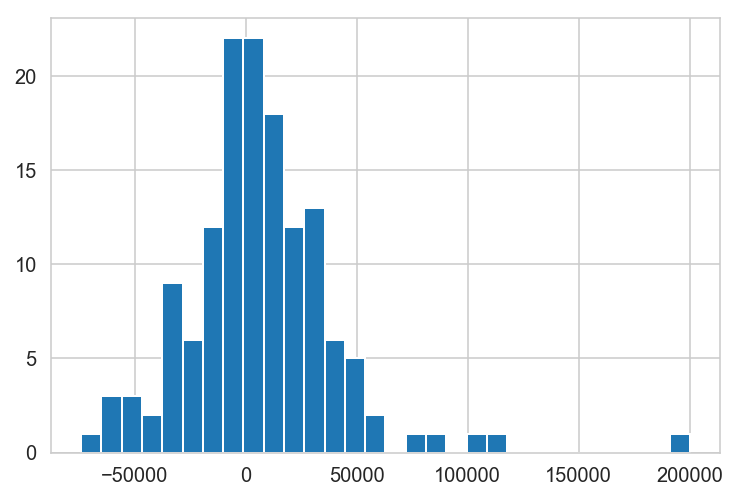

In [409]:
#plotting the residuals
plt.hist(residuals,bins=30)

In [410]:
abs(residuals).mean()
# the mean of our residuals is aproximately $23,789, which means that is on average how off our prediction is.

23789.835598127218

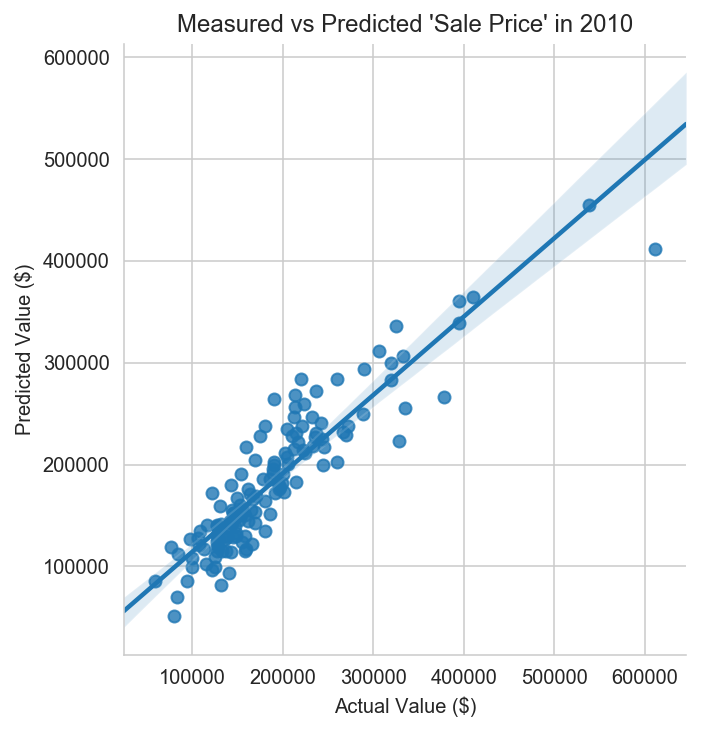

In [411]:
df = pd.DataFrame()
df['Actual Value ($)'] = y_test
df['Predicted Value ($)'] = model.predict(X_test)
sns.lmplot(x='Actual Value ($)', y='Predicted Value ($)', data = df);
ax = plt.gca()
ax.set_title("Measured vs Predicted 'Sale Price' in 2010");


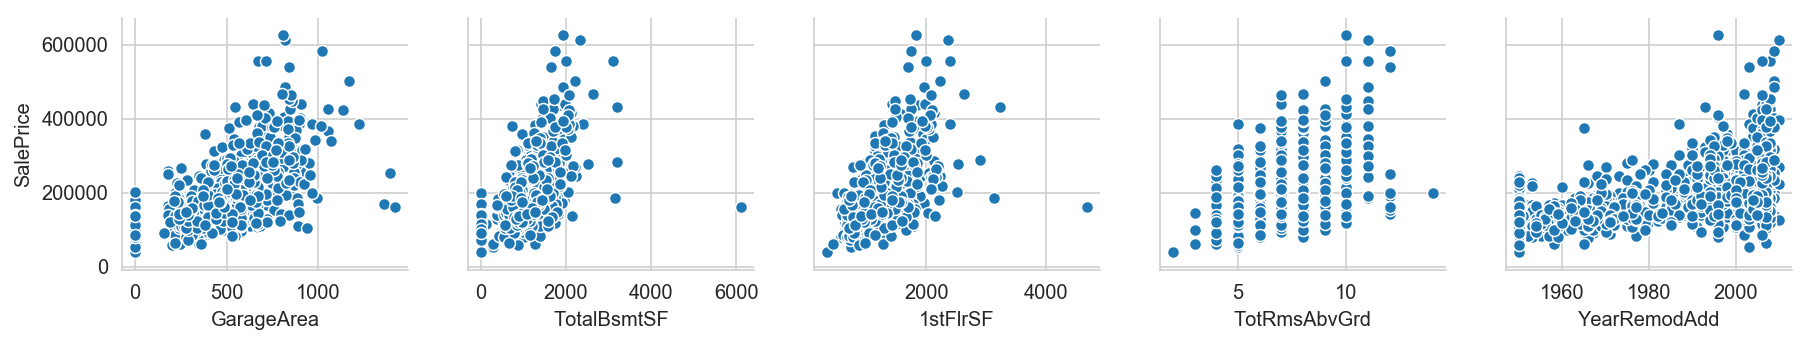

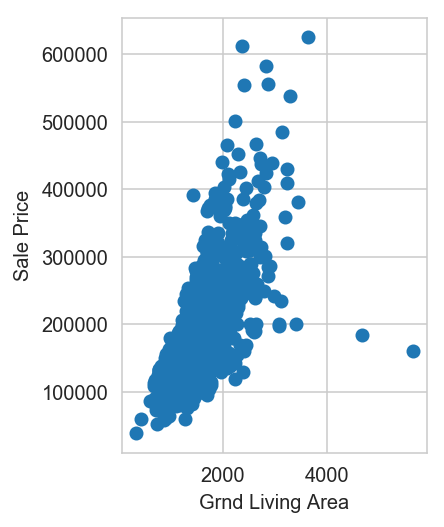

In [412]:
var = [ 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'TotRmsAbvGrd','YearRemodAdd' ]
sns.pairplot(x_vars = var, y_vars = 'SalePrice', data = numeric_features_comb1)
plt.show()

plt.subplot(1,2,2)
plt.scatter(house_new.GrLivArea, house_new.SalePrice)
plt.xlabel('Grnd Living Area')
plt.ylabel('Sale Price')
plt.show()

(Text(0.5, 0, 'Total SF'), Text(0, 0.5, 'Sale Price'))

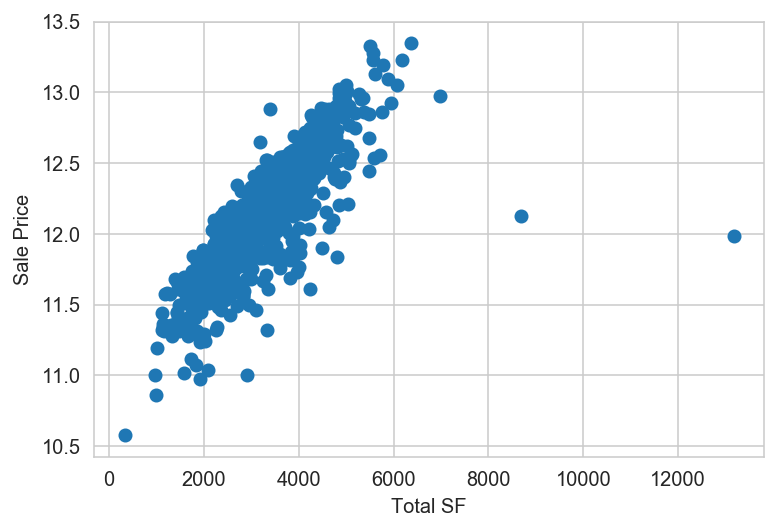

In [413]:
house_new["totalSF"] = house_new["TotalBsmtSF"] + house_new["1stFlrSF"] + house_new["2ndFlrSF"] + house_new['GarageArea']
plt.scatter(house_new['totalSF'], np.log(house_new.SalePrice))
plt.xlabel('Total SF'), plt.ylabel('Sale Price')



In [414]:
#checking the corelation between numerical variables
numeric_features_comb1=pd.concat([numeric_features['SalePrice'], numeric_features_comb], axis=1, sort=False)
corr = numeric_features_comb1.corr()


# get the correlation values of each variable with Sale Price and sort them in descending order
y_corr =corr['SalePrice'].sort_values(ascending=False)
y_corr.head(20)



SalePrice       1.000000
GrLivArea       0.700087
GarageArea      0.628174
TotalBsmtSF     0.584141
1stFlrSF        0.572227
TotRmsAbvGrd    0.556107
YearBuilt       0.546050
FullBath        0.536416
MasVnrArea      0.528271
YearRemodAdd    0.527483
Fireplaces      0.440074
NridgHt         0.439479
BsmtFinSF1      0.348231
2ndFlrSF        0.329458
NoRidge         0.300738
HalfBath        0.276143
LotFrontage     0.257538
StoneBr         0.232532
LotArea         0.228536
BsmtUnfSF       0.225240
Name: SalePrice, dtype: float64

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Determine any value of *changeable* property characteristics unexplained by the *fixed* ones.

---

Now that you have a model that estimates the price of a house based on its static characteristics, we can move forward with part 2 and 3 of the plan: what are the costs/benefits of quality, condition, and renovations?

There are two specific requirements for these estimates:
1. The estimates of effects must be in terms of dollars added or subtracted from the house value. 
2. The effects must be on the variance in price remaining from the first model.

The residuals from the first model (training and testing) represent the variance in price unexplained by the fixed characteristics. Of that variance in price remaining, how much of it can be explained by the easy-to-change aspects of the property?

---

**Your goals:**
1. Evaluate the effect in dollars of the renovate-able features. 
- How would your company use this second model and its coefficients to determine whether they should buy a property or not? Explain how the company can use the two models you have built to determine if they can make money. 
- Investigate how much of the variance in price remaining is explained by these features.
- Do you trust your model? Should it be used to evaluate which properties to buy and fix up?

In [415]:
#list of renovatable features

col2= ['SalePrice','Utilities','OverallQual','RoofStyle','RoofMatl','Exterior1st','Exterior2nd',\
          'MasVnrType','MasVnrArea','ExterQual','ExterCond','BsmtCond','BsmtExposure','BsmtFinType1',\
          'BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','KitchenQual',\
          'FireplaceQu','GarageFinish','GarageQual','GarageCond','PavedDrive','PoolQC','YrSold']

In [416]:
house_var= house_new[col2]



#Combined the features EnclosedPorch','3SsnPorch','ScreenPorch','OpenPorchSF','WoodDeckSF as total porch area to check correlation with outdoor area

def sum_frame_by_column(frame, new_col_name, list_of_cols_to_sum):
    frame[new_col_name] = frame[list_of_cols_to_sum].astype(float).sum(axis=1)
    return(frame)

sum_frame_by_column(house_var,'Total_porch_Area',['EnclosedPorch','3SsnPorch','ScreenPorch','OpenPorchSF','WoodDeckSF'])

house_var=house_var.drop(['EnclosedPorch','3SsnPorch','ScreenPorch','OpenPorchSF','WoodDeckSF'],axis=1)


In [417]:
house_var['residuals']=residuals
house_var['residuals']=house_var['residuals'].fillna(0)




In [418]:
#replacing ordinal columns 

ordinal_cols = ['GarageQual', 'GarageCond', 'BsmtQual', 'BsmtCond',
               'HeatingQC', 'ExterQual', 'ExterCond', 'KitchenQual','OverallQual','PoolQC']
for col in ordinal_cols:
    house_var= house_var.replace({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1,'NA':0})

In [419]:
#There is a correlation between saleprice and variables Total_porch area, masvnrarea, overallquality
#high correlation with overall quality

In [420]:
#creating dummy variables for nominal variables in renovatable features

dummies=pd.get_dummies(house_var[['GarageFinish', 'Utilities','RoofStyle','Exterior2nd','Electrical','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','RoofMatl','Exterior1st','MasVnrType','PavedDrive' ]],drop_first=True)

In [421]:
set(numeric_features_fixed).union(new_fixed_col)


{'1stFlrSF',
 '2ndFlrSF',
 'BedroomAbvGr',
 'BldgType',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtFullBath',
 'BsmtHalfBath',
 'BsmtUnfSF',
 'Condition1',
 'Condition2',
 'Fireplaces',
 'Foundation',
 'FullBath',
 'GarageArea',
 'GarageType',
 'GrLivArea',
 'HalfBath',
 'HouseStyle',
 'LandContour',
 'LotArea',
 'LotConfig',
 'LotFrontage',
 'LowQualFinSF',
 'MSSubClass',
 'MSZoning',
 'MasVnrArea',
 'MiscFeature',
 'MiscVal',
 'MoSold',
 'Neighborhood',
 'PoolArea',
 'SaleCondition',
 'SaleType',
 'Street',
 'TotRmsAbvGrd',
 'TotalBsmtSF',
 'YearBuilt',
 'YearRemodAdd',
 'YrSold'}

In [ ]:

new_fixed_col = set(fixed_col)-(set(house_new[fixed_col].columns).intersection(set(house_new[col2].columns)))

In [422]:
house_fixed = pd.concat([house_new[list(numeric_features_fixed)],pd.get_dummies(house_new[new_fixed_col])],axis='columns')

In [423]:
#combining dummies 
house_var= pd.concat([dummies, house_var], axis=1, sort=False)

In [424]:
house_var=house_var.drop(['GarageFinish','Utilities','RoofStyle','Exterior2nd','Electrical','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','RoofMatl','Exterior1st','MasVnrType','PavedDrive'],axis=1)

In [425]:
house_var.shape

(1165, 87)

In [426]:
corr = house_var.corr()


# get the correlation values of each variable with Sale Price and sort them in descending order
y_corr =corr['SalePrice'].sort_values(ascending=False)

y_corr.head(27)



SalePrice              1.000000
OverallQual            0.804392
ExterQual              0.693997
KitchenQual            0.668703
MasVnrArea             0.528271
FireplaceQu            0.520313
BsmtFinType1_GLQ       0.437303
GarageFinish_Fin       0.408856
MasVnrType_Stone       0.346432
Exterior1st_VinylSd    0.320358
Exterior2nd_VinylSd    0.319904
BsmtExposure_4         0.317328
RoofStyle_Hip          0.245145
GarageQual             0.242818
Exterior1st_CemntBd    0.242510
GarageCond             0.241494
Exterior2nd_CmentBd    0.236660
Electrical_SBrkr       0.227164
BsmtCond               0.225460
CentralAir_Y           0.213244
MasVnrType_BrkFace     0.201843
residuals              0.199906
PavedDrive_Y           0.194024
BsmtFinType2_Unf       0.148702
GarageFinish_RFn       0.136866
BsmtExposure_Av        0.126535
Heating_GasA           0.085493
Name: SalePrice, dtype: float64

In [427]:
#creating a list of highly correlated(to saleprice) renovatable columns

col_corr= ['OverallQual','ExterQual','KitchenQual','MasVnrArea','FireplaceQu','BsmtFinType1_GLQ','GarageFinish_Fin','MasVnrType_Stone',\
           'Exterior1st_VinylSd','Exterior2nd_VinylSd','BsmtExposure_4','RoofStyle_Hip','GarageQual','Exterior1st_CemntBd',\
           'GarageCond','Exterior2nd_CmentBd','residuals','Electrical_SBrkr','BsmtCond','CentralAir_Y','MasVnrType_BrkFace',\
           'PavedDrive_Y','BsmtFinType2_Unf','GarageFinish_RFn','BsmtExposure_Av','YrSold']      

In [429]:
#new_fixed_col = set(fixed_col)-(set(house_new[fixed_col].columns).intersection(set(house_new[col2].columns)))

In [212]:
house_new[new_fixed_col]


,MSZoning,LotConfig,SaleCondition,Condition2,Street,BldgType,SaleType,Foundation,Neighborhood,HouseStyle,GarageType,MiscFeature,LandContour,Condition1
0,RL,Inside,Normal,Norm,Pave,1Fam,WD,PConc,CollgCr,2Story,Attchd,NA,Lvl,Norm
1,RL,FR2,Normal,Norm,Pave,1Fam,WD,CBlock,Veenker,1Story,Attchd,NA,Lvl,Feedr
2,RL,Inside,Normal,Norm,Pave,1Fam,WD,PConc,CollgCr,2Story,Attchd,NA,Lvl,Norm
3,RL,Corner,Abnorml,Norm,Pave,1Fam,WD,BrkTil,Crawfor,2Story,Detchd,NA,Lvl,Norm
4,RL,FR2,Normal,Norm,Pave,1Fam,WD,PConc,NoRidge,2Story,Attchd,NA,Lvl,Norm
5,RL,Inside,Normal,Norm,Pave,1Fam,WD,Wood,Mitchel,1.5Fin,Attchd,Shed,Lvl,Norm
6,RL,Inside,Normal,Norm,Pave,1Fam,WD,PConc,Somerst,1Story,Attchd,NA,Lvl,Norm
7,RL,Corner,Normal,Norm,Pave,1Fam,WD,CBlock,NWAmes,2Story,Attchd,Shed,Lvl,PosN
8,RL,Corner,Normal,Artery,Pave,2fmCon,WD,BrkTil,BrkSide,1.5Unf,Attchd,NA,Lvl,Artery
9,RL,Inside,Normal,Norm,Pave,1Fam,WD,CBlock,Sawyer,1Story,Detchd,NA,Lvl,Norm


In [199]:
#creating a dataframe of highly correlated renovatable columns
house_var1= house_var[col_corr]



In [366]:
#Assigning the target and predictor variables

y= house_var1['residuals']
X= house_var1.drop('residuals',axis=1)




In [434]:
X_train_1 = house_fixed[house_fixed['YrSold']<2010]
X_test_1 = house_fixed[house_fixed['YrSold']==2010]
y_train_1 = house_new[house_new['YrSold']<2010]['SalePrice']
y_test_1 = house_new[house_new['YrSold']==2010]['SalePrice']

linreg_1 = LinearRegression()
fixed_model =linreg_1.fit( X_train_1, y_train_1)


predictions_train =fixed_model.predict(X_train_1)
predictions_test = fixed_model.predict(X_test_1)

house_var[house_new['YrSold']<2010]['residuals'] = predictions_train - y_train_1
house_var[house_new['YrSold']==2010]['residuals'] = predictions_test - y_test_1
# predictions_test = linreg_model.predict(X_test_1)

try:
    house_var.pop('SalePrice')
    house_fixed.pop('SalePrice')
except:
    pass

#creating a second model and checking the scores
X_train_2 = house_var[house_var['YrSold']<2010]
X_test_2 = house_var[house_var['YrSold']==2010]
y_train_2 =  predictions_train - y_train_1 
y_test_2 = predictions_test - y_test_1

In [431]:
print('Score of model2: ',var_model.score(X_test_2,y_test_2))
abs(residual_predict).mean()

ValueError: shapes (141,86) and (10,) not aligned: 86 (dim 1) != 10 (dim 0)

In [447]:
X_train_1 = house_fixed[house_fixed['YrSold']<2010]
X_test_1 = house_fixed[house_fixed['YrSold']==2010]
y_train_1 = house_new[house_new['YrSold']<2010]['SalePrice']
y_test_1 = house_new[house_new['YrSold']==2010]['SalePrice']

linreg_1 = LinearRegression()
fixed_model =linreg_1.fit( X_train_1, y_train_1)


predictions_train =fixed_model .predict(X_train_1)
predictions_test =fixed_model.predict(X_test_1)




# creating a model and checking the scores
X_train_2 = house_var[house_var['YrSold']<2010]
X_test_2 = house_var[house_var['YrSold']==2010]


kbest = SelectKBest(f_regression,k=12).fit(X_train_2,y_train_2)
X_train_2 = kbest.transform(X_train_2)
X_test_2 = kbest.transform(X_test_2)

# X_test_2 = SelectKBest(f_regression,k=15).fit_transform(X_train_2,y_train_2)


house_var[house_new['YrSold']<2010]['residuals'] = predictions_train - y_train_1
house_var[house_new['YrSold']==2010]['residuals'] = predictions_test - y_test_1
# predictions_test = linreg_model.predict(X_test_1)

try:
    house_var.pop('SalePrice')
    house_fixed.pop('SalePrice')
except:
    pass

#creating a model and checking the scores
# X_train_2 = house_var[house_var['YrSold']<2010]
# X_test_2 = house_var[house_var['YrSold']==2010]
y_train_2 =  predictions_train - y_train_1 
y_test_2 = predictions_test - y_test_1

var_model = linreg.fit(X_train_2,y_train_2)
print('Score of model2: ',var_model.score(X_test_2,y_test_2))
abs(residual_predict).mean()

Score of model2:  0.10656111049171135


21260.12717682057

In [448]:

# linear model with non fixed onto residuals
predictions = var_model.predict(X_test_2)
residual_predict= predictions-y_test_2


In [454]:
print(var_model.coef_)

[  -444.66611131   3313.26703235  -1649.35555936  -9238.07856156
 -12350.25340235   1018.31842549  -1997.68607417 -21036.87360249
  -9568.97417198  -2363.29350619   3230.25242407  -2035.62474963]


In [449]:
#y_train.value_counts()

In [450]:
from sklearn.feature_selection import VarianceThreshold,f_regression
from sklearn.feature_selection import SelectKBest

In [451]:
#X_train_2.columns[kbest.get_support()]

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [452]:
sns.heatmap(X_train_2.corr()[X_train_2.corr()<0.9])

AttributeError: 'numpy.ndarray' object has no attribute 'corr'

In [318]:
X_train_2.corrwith(y_train).abs().sort_values(ascending=False)

OverallQual            0.808555
ExterQual              0.686306
KitchenQual            0.666516
FireplaceQu            0.531604
MasVnrArea             0.526828
BsmtFinType1_GLQ       0.447102
GarageFinish_Unf       0.408126
GarageFinish_Fin       0.402448
MasVnrType_None        0.391081
MasVnrType_Stone       0.355079
Exterior1st_VinylSd    0.324551
Exterior2nd_VinylSd    0.321620
BsmtExposure_4         0.314119
Exterior2nd_CmentBd    0.246236
BsmtExposure_No        0.245832
GarageQual             0.243698
GarageCond             0.241685
Exterior1st_CemntBd    0.239618
RoofStyle_Hip          0.236733
Electrical_SBrkr       0.231611
BsmtCond               0.229969
RoofStyle_Gable        0.225478
PavedDrive_Y           0.209344
MasVnrType_BrkFace     0.207110
CentralAir_Y           0.206654
Exterior1st_Wd Sdng    0.171479
Exterior2nd_Wd Sdng    0.171034
BsmtFinType1_Rec       0.164466
Exterior1st_MetalSd    0.163190
Exterior2nd_MetalSd    0.159235
                         ...   
Electric

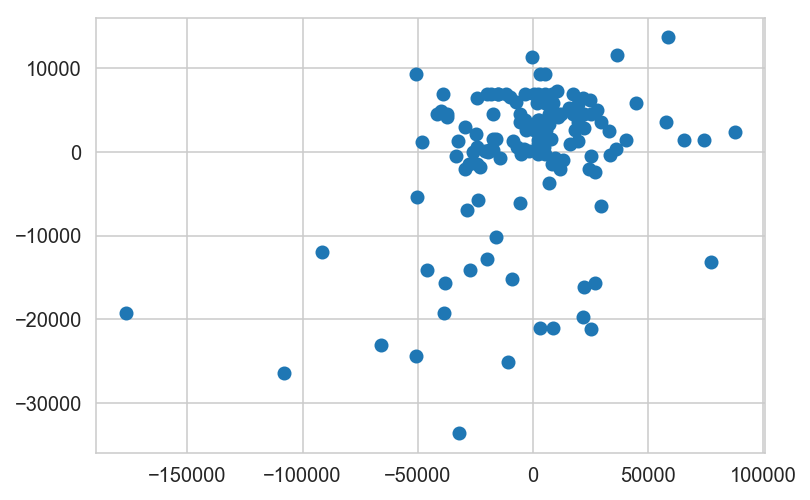

In [453]:
plt.scatter(y_test_2,predictions)

In [137]:
corr = house_var1.corr()


# get the correlation values of each variable with Sale Price and sort them in descending order
y_corr =corr['residuals'].sort_values(ascending=False)

y_corr.head(10)

residuals           1.000000
BsmtExposure_4      0.106316
YrSold              0.101115
GarageFinish_Fin    0.092819
RoofStyle_Hip       0.086888
KitchenQual         0.085206
OverallQual         0.082929
ExterQual           0.081830
BsmtFinType2_Unf    0.063073
MasVnrArea          0.059740
Name: residuals, dtype: float64

In [1]:
Part 1 & 2 Conclusions
The sales price can be modelled with much greater accuracy using fixed features, than the residuals from this model can be predicted using changeable features!!  I would therefore trust my first model as a good indicator of which properties to buy (based on their fixed features), however I wouldn't trust a model's ability to accurately identify which properties to renovate and how.


The linear relationship between the 2 remaining numerical predictors (OverallQual and OverallCond) and the residuals was relatively week.

SyntaxError: invalid syntax (<ipython-input-1-f9f677d24071>, line 1)

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. What property characteristics predict an "abnormal" sale?

---

The `SaleCondition` feature indicates the circumstances of the house sale. From the data file, we can see that the possibilities are:

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)
       
One of the executives at your company has an "in" with higher-ups at the major regional bank. His friends at the bank have made him a proposal: if he can reliably indicate what features, if any, predict "abnormal" sales (foreclosures, short sales, etc.), then in return the bank will give him first dibs on the pre-auction purchase of those properties (at a dirt-cheap price).

He has tasked you with determining (and adequately validating) which features of a property predict this type of sale. 

---

**Your task:**
1. Determine which features predict the `Abnorml` category in the `SaleCondition` feature.
- Justify your results.

This is a challenging task that tests your ability to perform classification analysis in the face of severe class imbalance. You may find that simply running a classifier on the full dataset to predict the category ends up useless: when there is bad class imbalance classifiers often tend to simply guess the majority class.

It is up to you to determine how you will tackle this problem. I recommend doing some research to find out how others have dealt with the problem in the past. Make sure to justify your solution. Don't worry about it being "the best" solution, but be rigorous.

Be sure to indicate which features are predictive (if any) and whether they are positive or negative predictors of abnormal sales.